# 爬取原始数据

In [158]:
import requests
import json
import random
url = 'https://jc.zhcw.com/port/client_json.php'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0",
    "Referer": "https://www.zhcw.com/"
}
cookies = {
    "Hm_lvt_692bd5f9c07d3ebd0063062fb0d7622f": "1701622572",
    "_gid": "GA1.2.1218667687.1701622572",
    "Hm_lvt_12e4883fd1649d006e3ae22a39f97330": "1701622573",
    "PHPSESSID": "6k70gq2h44nksmou3n8374jq13",
    "_ga_9FDP3NWFMS": "GS1.1.1701622572.1.1.1701623257.0.0.0",
    "_ga": "GA1.2.1720843243.1701622572",
    "Hm_lpvt_12e4883fd1649d006e3ae22a39f97330": "1701623257",
    "Hm_lpvt_692bd5f9c07d3ebd0063062fb0d7622f": "1701623258"
}
params = {
        'callback':'jQuery112208474410773064831_1701622567918',
        'transactionType':10001001,
        'lotteryId':1,
        'issueCount':0,
        'startIssue':'',
        'endIssue':'',
        'startDate':'2003-02-01',
        'endDate':'2003-04-01',
        'type':2,
        'pageNum':1,'pageSize':30,
        "tt": random.random(),
        "_": str(int(time.time() * 1000))
    }
# 发送HTTP GET请求
response = requests.get(url,headers=headers,cookies=cookies,params=params)

# 提取JSONP响应中的JSON数据
json_data = response.text.split('(')[1].split(')')[0]
# 解析JSON数据
data = json.loads(json_data)
# 提取双色球号码信息
for entry in data['data']:
    issue = entry['issue']
    openTime = entry["openTime"]
    front_winning_num = entry['frontWinningNum']
    back_winning_num = entry['backWinningNum']
    saleMoney = entry["saleMoney"]
    print(f"{issue} |{openTime}|{front_winning_num} |{back_winning_num} |{saleMoney}")


2003011 |2003-03-30|04 05 11 12 30 32 |15 |12782494
2003010 |2003-03-27|01 02 08 13 17 24 |13 |12402130
2003009 |2003-03-23|05 09 18 20 22 30 |09 |12386072
2003008 |2003-03-20|05 08 09 14 17 23 |08 |11696278
2003007 |2003-03-16|01 09 19 21 23 26 |07 |12124030
2003006 |2003-03-13|01 03 10 21 26 27 |06 |10919658
2003005 |2003-03-09|04 06 15 17 30 31 |16 |10661438
2003004 |2003-03-06|04 06 07 10 13 25 |03 |9517794
2003003 |2003-03-02|01 07 10 23 28 32 |16 |8917960
2003002 |2003-02-27|04 09 19 20 21 26 |12 |7398870
2003001 |2003-02-23|10 11 12 13 26 28 |11 |10307806


## 生成时间间隔

In [41]:
import datetime
def add_two_months(date_str):
    date_format = "%Y-%m-%d"
    current_date = datetime.datetime.strptime(date_str, date_format)
    now = datetime.datetime.now()
    datestart = []
    dateend = []
    while current_date < now:
        datestart.append(current_date.strftime(date_format))
        current_date_end = current_date + datetime.timedelta(days=59)
        if  current_date_end < now:
            dateend.append(current_date_end.strftime(date_format))
        else:
            dateend.append(now.strftime(date_format))
        current_date = current_date + datetime.timedelta(days=60)
    return datestart,dateend
start_date = "2003-02-01"
datestart,dateend = add_two_months(start_date)
print(datestart)
print(dateend)

['2003-02-01', '2003-04-02', '2003-06-01', '2003-07-31', '2003-09-29', '2003-11-28', '2004-01-27', '2004-03-27', '2004-05-26', '2004-07-25', '2004-09-23', '2004-11-22', '2005-01-21', '2005-03-22', '2005-05-21', '2005-07-20', '2005-09-18', '2005-11-17', '2006-01-16', '2006-03-17', '2006-05-16', '2006-07-15', '2006-09-13', '2006-11-12', '2007-01-11', '2007-03-12', '2007-05-11', '2007-07-10', '2007-09-08', '2007-11-07', '2008-01-06', '2008-03-06', '2008-05-05', '2008-07-04', '2008-09-02', '2008-11-01', '2008-12-31', '2009-03-01', '2009-04-30', '2009-06-29', '2009-08-28', '2009-10-27', '2009-12-26', '2010-02-24', '2010-04-25', '2010-06-24', '2010-08-23', '2010-10-22', '2010-12-21', '2011-02-19', '2011-04-20', '2011-06-19', '2011-08-18', '2011-10-17', '2011-12-16', '2012-02-14', '2012-04-14', '2012-06-13', '2012-08-12', '2012-10-11', '2012-12-10', '2013-02-08', '2013-04-09', '2013-06-08', '2013-08-07', '2013-10-06', '2013-12-05', '2014-02-03', '2014-04-04', '2014-06-03', '2014-08-02', '2014

## 爬取数据并保存

In [52]:
file = open('Bicolorballs.csv', 'w')  # 打开Bicolorballs.csv文件，写模式
for s,e  in zip(datestart,dateend):
    params = {
        'callback':'jQuery112208474410773064831_1701622567918',
        'transactionType':10001001,
        'lotteryId':1,
        'issueCount':0,
        'startIssue':'',
        'endIssue':'',
        'startDate':s,
        'endDate':e,
        'type':2,
        'pageNum':1,'pageSize':30,
        "tt": random.random(),
        "_": str(int(time.time() * 1000))
    }
    # 发送HTTP GET请求
    response = requests.get(url,headers=headers,cookies=cookies,params=params)

    # 提取JSONP响应中的JSON数据
    json_data = response.text.split('(')[1].split(')')[0]
    # 解析JSON数据
    data = json.loads(json_data)
    # 提取双色球号码信息
    for entry in data['data']:
        issue = entry['issue']
        openTime = entry["openTime"]
        front_winning_num = entry['frontWinningNum']
        back_winning_num = entry['backWinningNum']
        saleMoney = entry["saleMoney"]
        prizePoolMoney = entry["prizePoolMoney"]
        data = f"{issue},{openTime},{front_winning_num},{back_winning_num},{saleMoney},{prizePoolMoney}\r\n"
        file.write(data)
file.close()  # 关闭文件

## 可视化销售数据

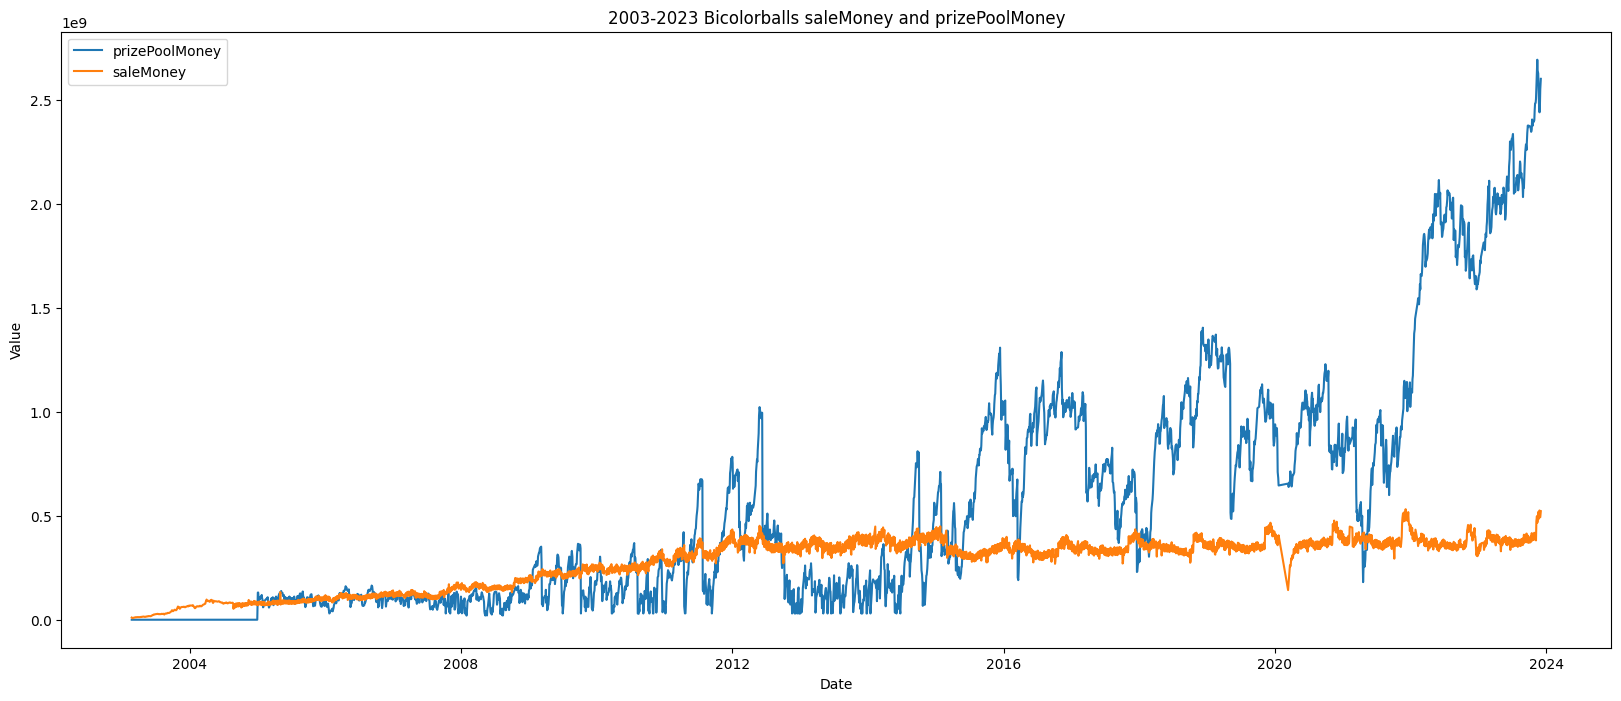

In [55]:
import csv
import datetime
import matplotlib.pyplot as plt

# 打开CSV文件
with open('Bicolorballs.csv', 'r') as file:
    # 创建CSV读取器
    reader = csv.reader(file)
    # 初始化列表来保存最后一列和倒数第二列的数据
    dates = []
    last_column = []
    second_last_column = []
    # 逐行读取CSV文件
    for row in reader:
        # 提取最后一列和倒数第二列的数据
        date = datetime.datetime.strptime(row[1], '%Y/%m/%d')
        last_value = float(row[-1])
        second_last_value = float(row[-2])
        # 添加到列表中
        dates.append(date)
        last_column.append(last_value)
        second_last_column.append(second_last_value)

# 绘制曲线
plt.figure(figsize=(20, 8)) 
plt.plot(dates, last_column, label='prizePoolMoney')
plt.plot(dates, second_last_column, label='saleMoney')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('2003-2023 Bicolorballs saleMoney and prizePoolMoney')
plt.legend()
plt.show()



## 可视化中奖球频次

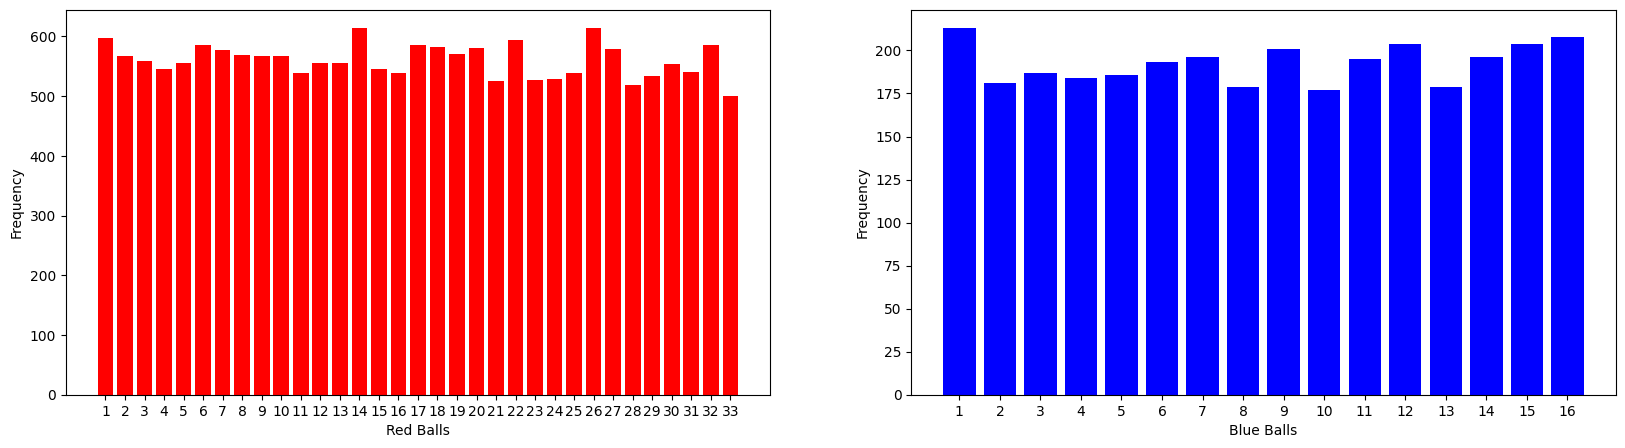

In [62]:
import csv
import datetime
import matplotlib.pyplot as plt

# 打开CSV文件
with open('Bicolorballs.csv', 'r') as file:
    # 创建CSV读取器
    reader = csv.reader(file)
    # 初始化列表来保存最后一列和倒数第二列的数据
    dates = []
    redL = [0 for i in range(34)]
    blueL = [0 for i in range(17)]
    # 逐行读取CSV文件
    for row in reader:
        # 提取最后一列和倒数第二列的数据
        red = row[2].split(' ')
        for r in red:
            redL[int(r)]=redL[int(r)]+1
        blue = row[3]
        blueL[int(blue)]=blueL[int(blue)]+1
# 绘制曲线

# 统计数据
red_counts = redL[1:]  # 去除索引为0的元素
blue_counts = blueL[1:]  # 去除索引为0的元素
# 设置红色和蓝色球的标签
red_labels = [str(i) for i in range(1, 34)]
blue_labels = [str(i) for i in range(1, 17)]

# 绘制直方图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.bar(red_labels, red_counts, color='red', label='Red Balls')
ax2.bar(blue_labels, blue_counts, color='blue', label='Blue Balls')

# 添加标题和标签
ax2.bar(blue_labels, blue_counts, color='blue')
ax2.set_xlabel('Blue Balls')
ax2.set_ylabel('Frequency')
# 绘制红色球的直方图
ax1.bar(red_labels, red_counts, color='red')
ax1.set_xlabel('Red Balls')
ax1.set_ylabel('Frequency')

# 显示图形
plt.show()




In [72]:
# 对数组进行排序
sorted_array = sorted(red_counts)
print(sorted_array)
for i in range(6):
    # 找到最大值的索引
    index = red_counts.index(sorted_array[-i-1])
    # 打印最大值和索引
    print("频次", sorted_array[-i-1],end = '  ')
    print("编号", index+1)
# 对数组进行排序
sorted_array = sorted(blue_counts)
index = blue_counts.index(sorted_array[-1])
print("频次", sorted_array[-1],end = '  ')
print("编号", index+1)

[501, 519, 526, 527, 528, 534, 539, 539, 539, 541, 545, 545, 553, 556, 556, 556, 558, 567, 567, 567, 569, 571, 578, 579, 581, 582, 585, 585, 586, 594, 597, 614, 614]
频次 614  编号 14
频次 614  编号 14
频次 597  编号 1
频次 594  编号 22
频次 586  编号 6
频次 585  编号 17
频次 213  编号 1


# 构造数据集

## 数据编码

In [103]:
import numpy as np
import tensorflow as tf

with open('Bicolorballs.csv', 'r') as file:
    reader = csv.reader(file)
    red_balls = []
    blue_balls = []
    for row in reader:
        red = np.array([int(i)-1 for i in row[2].split(' ')])
        # 编码
        red = tf.one_hot(red, depth=33)
        red = tf.reduce_sum(red, axis=0)
        red_balls.append(red)
        blue = np.array([int(row[3])-1])
        blue = tf.one_hot(blue, depth=16)
        blue = tf.reduce_sum(blue, axis=0)
        blue_balls.append(blue)
print("数据集长度为：",len(red_balls))
print("红球编码后为：",red_balls[0].numpy())
print("蓝球编码后为：",blue_balls[0].numpy())

数据集长度为： 3083
红球编码后为： [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0.]
蓝球编码后为： [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## 数据集构造

In [99]:
data = tf.stack(red_balls)
# 定义超参数
n_steps = 150  # 时间步数，即每个样本包含的历史时间步数
T = len(data)
features = []
for i in range(T-n_steps):
    features.append(data[i: n_steps + i,:])
labels = data[n_steps:,:]
features = tf.stack(features) 

# 将数据集划分为训练集和测试集
train_size = int(len(data) * 0.8)
train_X, train_y = features[:train_size], labels[:train_size]
test_X, test_y = features[train_size:],labels[train_size:]

# 创建tf.data.Dataset对象
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y))

# 可选：对数据集进行一些预处理操作，例如乱序、批量化和缓存等
train_dataset = train_dataset.shuffle(100).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).cache().prefetch(tf.data.AUTOTUNE)

In [100]:
data,label = iter(train_dataset.take(1)).next()
i = 3
print(data.shape)

(32, 150, 33)


# 模型构造

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import LearningRateScheduler
# 定义输入和输出形状
input_shape = (150, 33)
output_shape = (1, 33)
# 创建双层LSTM网络
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=input_shape))  # 第一层LSTM
model.add(LSTM(64))  # 第二层LSTM
model.add(Dense(output_shape[-1], activation='sigmoid'))  # 输出层
# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# 打印模型结构
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 150, 64)           25088     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 33)                2145      
                                                                 
Total params: 60,257
Trainable params: 60,257
Non-trainable params: 0
_________________________________________________________________


## 红球模型训练

In [113]:
from datetime import datetime
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
EPOCHS = 400
NetNAME = 'LSTM2_lr100'
tf.debugging.set_log_device_placement(True)
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
NAME = timestamp + NetNAME +"_batchsize";print(NAME)
logdir = "./logs/" + NAME
modeldir = "./model/"+NAME+".h5"

# 不调整学习率会比较好
def lr_scheduler(epoch, lr):
    if epoch % 100 == 0 and epoch != 0:
        lr = lr / 2
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=modeldir, monitor='val_accuracy', verbose=1, save_best_only=True, mode = 'max')
with tf.device('/GPU:0'):
    model.fit(
        x=train_dataset, 
        epochs=EPOCHS,     
        validation_data=test_dataset,    
        callbacks=[tensorboard_callback,checkpoint])   

20231204-174742LSTM2_lr100_batchsize
Epoch 1/400
75/78 [===========================>..] - ETA: 0s - loss: 23.0080 - accuracy: 0.0088
Epoch 1: val_accuracy improved from -inf to 0.00857, saving model to ./model\20231204-174742LSTM2_lr100_batchsize.h5
78/78 [==============================] - 4s 26ms/step - loss: 23.0241 - accuracy: 0.0089 - val_loss: 23.5957 - val_accuracy: 0.0086 - lr: 0.0010
Epoch 2/400
76/78 [============================>.] - ETA: 0s - loss: 23.0925 - accuracy: 0.0103
Epoch 2: val_accuracy did not improve from 0.00857
78/78 [==============================] - 1s 16ms/step - loss: 23.0918 - accuracy: 0.0105 - val_loss: 22.7870 - val_accuracy: 0.0086 - lr: 0.0010
Epoch 3/400
76/78 [============================>.] - ETA: 0s - loss: 22.5857 - accuracy: 0.0095
Epoch 3: val_accuracy did not improve from 0.00857
78/78 [==============================] - 1s 16ms/step - loss: 22.5785 - accuracy: 0.0097 - val_loss: 22.4689 - val_accuracy: 0.0086 - lr: 0.0010
Epoch 4/400
78/78 [==

## 蓝球模型训练

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from datetime import datetime
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler

data = tf.stack(blue_balls)
# 定义超参数
n_steps = 150  # 时间步数，即每个样本包含的历史时间步数
T = len(data)
features = []
for i in range(T-n_steps):
    features.append(data[i: n_steps + i,:])
labels = data[n_steps:,:]
features = tf.stack(features) 

# 将数据集划分为训练集和测试集
train_size = int(len(data) * 0.8)
train_X, train_y = features[:train_size], labels[:train_size]
test_X, test_y = features[train_size:],labels[train_size:]

# 创建tf.data.Dataset对象
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y))

# 可选：对数据集进行一些预处理操作，例如乱序、批量化和缓存等
train_dataset = train_dataset.shuffle(100).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).cache().prefetch(tf.data.AUTOTUNE)

# 定义输入和输出形状
input_shape = (150, 16)
output_shape = (1, 16)
# 创建双层LSTM网络
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=input_shape))  # 第一层LSTM
model.add(LSTM(64))  # 第二层LSTM
model.add(Dense(output_shape[-1], activation='softmax'))  # 输出层
# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 打印模型结构


EPOCHS = 400
NetNAME = 'B_LSTM2'
tf.debugging.set_log_device_placement(True)
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
NAME = timestamp + NetNAME +"_batchsize";print(NAME)
logdir = "./logs/" + NAME
modeldir = "./model/"+NAME+".h5"

def lr_scheduler(epoch, lr):
    if epoch % 100 == 0 and epoch != 0:
        lr = lr / 2
    return lr
lr_callback = LearningRateScheduler(lr_scheduler)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=modeldir, monitor='val_accuracy', verbose=1, save_best_only=True, mode = 'max')
with tf.device('/GPU:0'):
    model.fit(
        x=train_dataset, 
        epochs=EPOCHS,     
        validation_data=test_dataset,    
        callbacks=[tensorboard_callback,checkpoint])


20231204-192802B_LSTM2_batchsize
Epoch 1/400
78/78 [==============================] - ETA: 0s - loss: 0.3152 - accuracy: 0.0604
Epoch 1: val_accuracy improved from -inf to 0.05353, saving model to ./model\20231204-192802B_LSTM2_batchsize.h5
78/78 [==============================] - 4s 27ms/step - loss: 0.3152 - accuracy: 0.0604 - val_loss: 0.2348 - val_accuracy: 0.0535
Epoch 2/400
76/78 [============================>.] - ETA: 0s - loss: 0.2347 - accuracy: 0.0567
Epoch 2: val_accuracy did not improve from 0.05353
78/78 [==============================] - 1s 17ms/step - loss: 0.2346 - accuracy: 0.0580 - val_loss: 0.2345 - val_accuracy: 0.0535
Epoch 3/400
77/78 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.0584
Epoch 3: val_accuracy did not improve from 0.05353
78/78 [==============================] - 1s 17ms/step - loss: 0.2347 - accuracy: 0.0588 - val_loss: 0.2347 - val_accuracy: 0.0535
Epoch 4/400
75/78 [===========================>..] - ETA: 0s - loss: 0.2348 -

## 推理验证程序

In [156]:
import tensorflow as tf
from tensorflow.keras.models import load_model

def CalculateTheAwards(R,B,Rlabel,Blabel):
    R = R.numpy()
    B = B.numpy()
    Rlabel = Rlabel.numpy()
    Blabel = Blabel.numpy()
    Rcount = 0
    Bcount = Blabel[B]
    for r in R:
        Rcount = Rcount + Rlabel[r]
    if Bcount+Rcount ==7:
        print('恭喜你，你中一等奖了！！百万大奖')
    elif Rcount ==6 and Bcount ==0:
        print('恭喜你，你中二等奖了！！十万大奖')
    elif Rcount ==5 and Bcount ==1:
        print('恭喜你，你中三等奖了！！300块')
    elif Bcount+Rcount ==5:
        print('恭喜你，你中四等奖了！！200块')
    elif Bcount+Rcount ==4:
        print('恭喜你，你中五等奖了！！10块钱')
    elif Bcount ==1 :
        print('恭喜你，你中六等奖了！！5块钱')
    else:
        print('很遗憾，你没有中奖')
# 加载模型
Rmodel = load_model('model/20231204-174742LSTM2_lr100_batchsize.h5')   #20231204-173622LSTM2_batchsize.h5
Bmodel = load_model('model/20231204-192802B_LSTM2_batchsize.h5')

i = 11
# 加载新的数据进行推理
R = tf.expand_dims(tf.stack(red_balls[-150-i:-i]), axis=0)
B = tf.expand_dims(tf.stack(blue_balls[-150-i:-i]), axis=0)
Rlabel = red_balls[-i]
Blabel = blue_balls[-i]
print('红球开奖结果：',Rlabel.numpy().astype(int))
print('蓝球开奖结果：',Blabel.numpy().astype(int))
# 对新数据进行预测
Rpredictions = Rmodel.predict(R,verbose=0)
Bpredictions = Bmodel.predict(B,verbose=0)
# # 打印预测结果
print(Rpredictions)
# print(Bpredictions)

# 选择出最大的5个元素及其索引
_, Rindices = tf.math.top_k(tf.constant(Rpredictions[0]), k=6)
_, Bindices = tf.math.top_k(tf.constant(Bpredictions[0]), k=5)
print(f'预测结果是红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[0]+1).numpy()}',end = '    ---->     ')
CalculateTheAwards(Rindices,Bindices[0],Rlabel,Blabel)
print(f'预测结果是红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[1]+1).numpy()}',end = '    ---->     ')
CalculateTheAwards(Rindices,Bindices[1],Rlabel,Blabel)
print(f'预测结果是红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[2]+1).numpy()}',end = '    ---->     ')
CalculateTheAwards(Rindices,Bindices[2],Rlabel,Blabel)
print(f'预测结果是红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[3]+1).numpy()}',end = '    ---->     ')
CalculateTheAwards(Rindices,Bindices[3],Rlabel,Blabel)
print(f'预测结果是红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[4]+1).numpy()}',end = '    ---->     ')
CalculateTheAwards(Rindices,Bindices[4],Rlabel,Blabel)

红球开奖结果： [0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
蓝球开奖结果： [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.9962148  0.99826235 0.99778795 0.9908155  0.99883455 0.9948278
  0.9923968  0.99721897 0.9941993  0.99848217 0.99918145 0.9965025
  0.99025273 0.9995783  0.99885345 0.9994025  0.9973465  0.97343314
  0.9976089  0.9992656  0.99827456 0.99794513 0.99430037 0.9979247
  0.9962347  0.99075454 0.9980453  0.9988097  0.99930334 0.988509
  0.9925971  0.9972344  0.9991424 ]]
预测结果是红球编号[14 16 29 20 11 33],蓝球编号为9    ---->     很遗憾，你没有中奖
预测结果是红球编号[14 16 29 20 11 33],蓝球编号为16    ---->     很遗憾，你没有中奖
预测结果是红球编号[14 16 29 20 11 33],蓝球编号为15    ---->     很遗憾，你没有中奖
预测结果是红球编号[14 16 29 20 11 33],蓝球编号为3    ---->     很遗憾，你没有中奖
预测结果是红球编号[14 16 29 20 11 33],蓝球编号为4    ---->     恭喜你，你中六等奖了！！5块钱


# 双色球应用程序

In [171]:
import requests
import json
import random
import tensorflow as tf
import numpy as np
from datetime import datetime,date
from tensorflow.keras.models import load_model
# 加载模型
Rmodel = load_model('model/20231204-174742LSTM2_lr100_batchsize.h5')   #20231204-173622LSTM2_batchsize.h5
Bmodel = load_model('model/20231204-192802B_LSTM2_batchsize.h5')

url = 'https://jc.zhcw.com/port/client_json.php'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0",
    "Referer": "https://www.zhcw.com/"
}
cookies = {
    "Hm_lvt_692bd5f9c07d3ebd0063062fb0d7622f": "1701622572",
    "_gid": "GA1.2.1218667687.1701622572",
    "Hm_lvt_12e4883fd1649d006e3ae22a39f97330": "1701622573",
    "PHPSESSID": "6k70gq2h44nksmou3n8374jq13",
    "_ga_9FDP3NWFMS": "GS1.1.1701622572.1.1.1701623257.0.0.0",
    "_ga": "GA1.2.1720843243.1701622572",
    "Hm_lpvt_12e4883fd1649d006e3ae22a39f97330": "1701623257",
    "Hm_lpvt_692bd5f9c07d3ebd0063062fb0d7622f": "1701623258"
}

history = []
for i in range(1,6):
    params = {
            'callback':'jQuery112208474410773064831_1701622567918',
            'transactionType':10001001,
            'lotteryId':1,
            'issueCount':150,
            'startIssue':'',
            'endIssue':'',
            'startDate':'',
            'endDate':'',
            'type':0,
            'pageNum':i,'pageSize':30,
            "tt": random.random(),
            "_": str(int(time.time() * 1000))
        }
    # 发送HTTP GET请求
    response = requests.get(url,headers=headers,cookies=cookies,params=params)

    # 提取JSONP响应中的JSON数据
    json_data = response.text.split('(')[1].split(')')[0]
    # 解析JSON数据
    data = json.loads(json_data)
    # 提取双色球号码信息
    for entry in data['data']:
        issue = int(entry['issue'])
        front_winning_num = entry['frontWinningNum']
        back_winning_num = entry['backWinningNum']
        history.append([issue,front_winning_num,back_winning_num])
# 按照期号进行排序
history = sorted(history, key=lambda x: x[0])
#print(history)        

red_history = []
blue_history = []
# 构造模型的输入数据
for h in history:
        red = np.array([int(i)-1 for i in h[1].split(' ')])
        # 编码
        red = tf.one_hot(red, depth=33)
        red = tf.reduce_sum(red, axis=0)
        red_history.append(red)
        blue = np.array([int(h[2])-1])
        blue = tf.one_hot(blue, depth=16)
        blue = tf.reduce_sum(blue, axis=0)
        blue_history.append(blue)        
#print(blue_balls)       



# # 加载新的数据进行推理
R = tf.expand_dims(tf.stack(red_history), axis=0)
B = tf.expand_dims(tf.stack(blue_history), axis=0)


# 对新数据进行预测
Rpredictions = Rmodel.predict(R,verbose=0)
Bpredictions = Bmodel.predict(B,verbose=0)
# # 打印预测结果
#print(Rpredictions)
# print(Bpredictions)

# # 选择出最大的5个元素及其索引
_, Rindices = tf.math.top_k(tf.constant(Rpredictions[0]), k=6)
_, Bindices = tf.math.top_k(tf.constant(Bpredictions[0]), k=5)
print('今天是:', date.today(),'  推理下一次双色球的号码是：')
print(f'1：红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[0]+1).numpy()}')
print(f'2：红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[1]+1).numpy()}')
print(f'3：红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[2]+1).numpy()}')
print(f'4：红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[3]+1).numpy()}')
print(f'5：红球编号{(Rindices+1).numpy()},蓝球编号为{(Bindices[4]+1).numpy()}')

今天是: 2023-12-04   推理下一次双色球的号码是：
1：红球编号[14 16 29 20 11 33],蓝球编号为1
2：红球编号[14 16 29 20 11 33],蓝球编号为10
3：红球编号[14 16 29 20 11 33],蓝球编号为12
4：红球编号[14 16 29 20 11 33],蓝球编号为7
5：红球编号[14 16 29 20 11 33],蓝球编号为13
